In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
%matplotlib inline
import math

In [2]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [4]:
qasm_sim = Aer.get_backend('qasm_simulator')
statevector_sim = Aer.get_backend('statevector_simulator')

In [15]:
def run(circuit):
    statevector_job = execute(circuit, backend=statevector_sim)
    result = statevector_job.result()
    statevector=result.get_statevector()
    num_qubits = circuit.num_qubits
    circuit.measure([i for i in range(num_qubits)],[i for i in range(num_qubits)])
    quasm_job = execute(circuit, backend=qasm_sim, shots=1024).result()
    counts = quasm_job.get_counts()
    return statevector, counts

In [19]:
circuit = QuantumCircuit(2,2)
circuit.h(0)
statevector, counts = run(circuit)

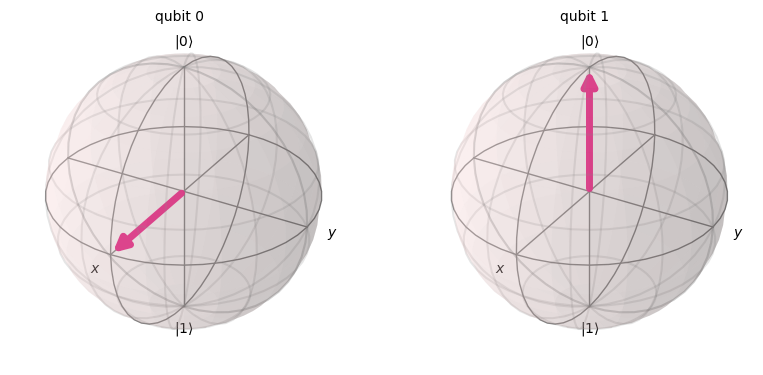

In [20]:
plot_bloch_multivector(statevector)

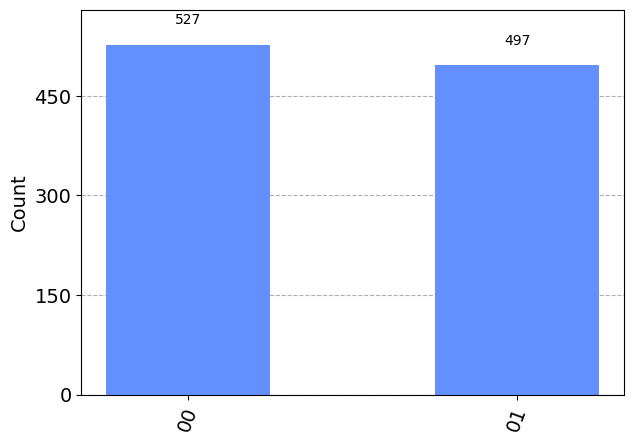

In [21]:
plot_histogram([counts])